In [1]:
import pandas as pd
import numpy as np
#from bamt import Preprocessors
#from bamt.Networks import HybridBN

In [2]:
sample = pd.read_csv("../Lab1/sample.csv")

In [8]:
sample['maxtempC'].value_counts().sort_index()

-14     10
-13      3
-12     14
-11     52
-10     31
-9      21
-8      28
-7     112
-6      96
-5      27
-4      49
-3      65
-2      75
-1      90
 0      84
 1     115
 2     108
 4      12
 6       8
Name: maxtempC, dtype: int64

In [3]:
import seaborn as sns

<AxesSubplot: xlabel='Friction_mean', ylabel='Density'>

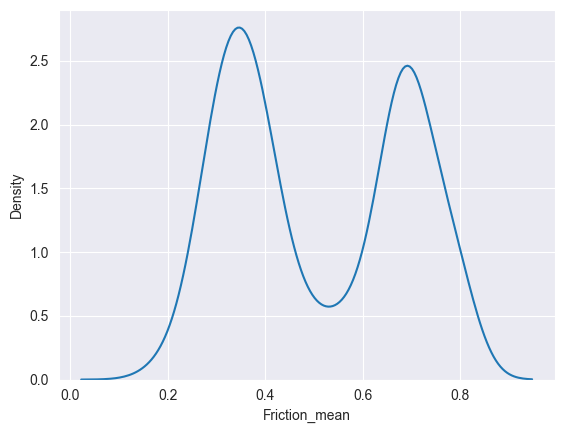

In [4]:
sns.kdeplot(x = sample['Friction_mean'])

<AxesSubplot: xlabel='Friction_mean', ylabel='Count'>

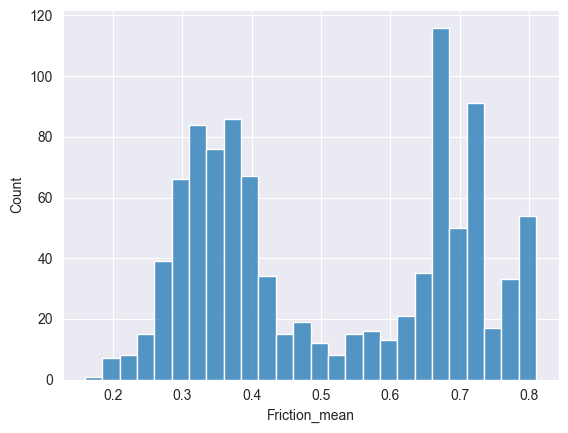

In [5]:
sns.histplot(x = sample['Friction_mean'], binwidth=0.025)

In [37]:
from scipy.stats import norm
from scipy.optimize import minimize

def EM_mixture_sep(data: np.array, init_z: np.array):
    a = 0.5
    a_prev = a+1
    n = data.shape[0]
    z = init_z

    sigma1, sigma2 = 0, 0
    mu1, mu2 = 0, 0
    loglikelihood, loglikelihood_prev = -np.inf, -np.inf
    i=0
    while np.abs(a - a_prev) > 1e-6 or loglikelihood == -np.inf:
        print(i)
        i+=1
        mu1 = ((1-z)*data).sum()/ (n - z.sum())
        mu2 = (z*data).sum()/ (z.sum())

        sigma1 = ((1-z)*(data - mu1)**2).sum()/(n - z.sum())
        sigma2 = (z*(data - mu2)**2).sum()/(z.sum())
        print(loglikelihood)
        z = a*norm.pdf(data, loc = mu2, scale = np.sqrt(sigma2)) / ((1-a)*norm.pdf(data, loc = mu1, scale = np.sqrt(sigma1)) + a*norm.pdf(data, loc = mu2, scale = np.sqrt(sigma2)))
        a_prev = a
        a = z.sum()/n
        loglikelihood_prev = loglikelihood
        loglikelihood = np.log((1-a)*norm.pdf(data, loc = mu1, scale = np.sqrt(sigma1)) + a*norm.pdf(data, loc = mu2, scale = np.sqrt(sigma2))).sum()
    return {'mu1': mu1, 'mu2': mu2, 'sigma1': sigma1, 'sigma2': sigma2, 'alpha': a, 'loglikelihood': loglikelihood}




In [38]:
res = EM_mixture_sep(sample['Friction_mean'].values, (sample['Friction_mean'].values > 0.5).astype(int))
res

0
-inf
1
648.099975019057
2
649.153477787171
3
649.6325693816491
4
649.7971496618077
5
649.8541483249176
6
649.8740852453902
7
649.8811100379148
8
649.8835971531706
9
649.884480367179
10
649.8847945900134
11
649.8849065068914
12
649.8849463952585
13
649.884960617653
14
649.8849656899479
15
649.8849674992008
16
649.884968144605


{'mu1': 0.3525776059089407,
 'mu2': 0.6944188493648833,
 'sigma1': 0.004259220238739424,
 'sigma2': 0.004062288003619298,
 'alpha': 0.46308563475092923,
 'loglikelihood': 649.8849683748481}

In [8]:
import matplotlib.pyplot as plt

In [40]:
x_grid = np.linspace(start=sample['Friction_mean'].min(), stop=sample['Friction_mean'].max())

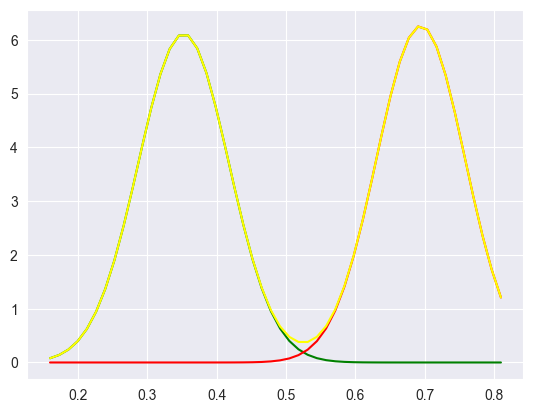

In [42]:
pdf1 = lambda x: norm.pdf(x, loc = res['mu1'], scale = np.sqrt(res['sigma1']))
pdf2 = lambda x: norm.pdf(x, loc = res['mu2'], scale = np.sqrt(res['sigma2']))
plt.plot(x_grid, pdf1(x_grid), c = 'green')
plt.plot(x_grid, pdf2(x_grid), c = 'red')
plt.plot(x_grid, pdf1(x_grid)+pdf2(x_grid), c = "yellow")

<AxesSubplot: ylabel='Count'>

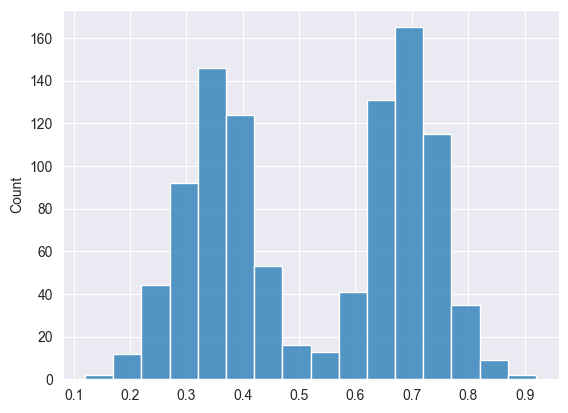

In [50]:
eta = np.random.normal(size=1000)
alpha = np.random.uniform(size=1000)
eta[alpha > res['alpha']] = eta[alpha > res['alpha']]*np.sqrt(res['sigma2']) + res['mu2']
eta[alpha < res['alpha']] = eta[alpha < res['alpha']]*np.sqrt(res['sigma1']) + res['mu1']
sns.histplot(x = eta, binwidth=0.05)

In [51]:
from scipy.stats import kstest
kstest(eta, sample['Friction_mean'])

KstestResult(statistic=0.06, pvalue=0.05462666510701526)

<AxesSubplot: xlabel='Height_mean', ylabel='Density'>

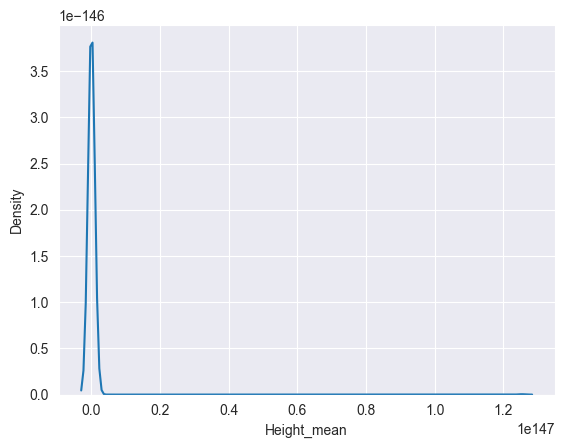

In [47]:
sns.kdeplot(x = sample['Height_mean'])

In [3]:
from bamt import Preprocessors

In [4]:
sample = pd.read_csv("../Lab1/sample.csv")

In [5]:
predictors = ['humidity', 'State_', 'Speed_mean', 'pressure', 'Height_mean', 'FeelsLikeC', 'totalSnow_cm']
target = ['Friction_mean', 'Water_mean', 'Tsurf_mean']
allfeatures = target + predictors

sample1 = sample[allfeatures]

In [6]:
from sklearn import preprocessing

In [7]:
encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=4, encode="ordinal", strategy="quantile")
p = Preprocessors.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
disc_sample, est = p.apply(sample1)

In [8]:
data_disc = sample1

In [9]:
disc_sample

,Friction_mean,Water_mean,Tsurf_mean,humidity,State_,Speed_mean,pressure,Height_mean,FeelsLikeC,totalSnow_cm
0,0,2,3,79,5,0,1030,3,-4,1
1,3,3,2,89,3,0,1002,3,-10,1
2,1,0,1,94,6,2,1020,0,-12,1
3,3,0,3,76,1,2,1013,1,-13,0
4,1,3,3,78,4,1,1004,3,-11,0
...,...,...,...,...,...,...,...,...,...,...
995,1,1,2,72,6,1,1018,3,-5,0
996,3,1,1,78,2,3,1014,1,-13,0
997,2,3,2,74,3,3,998,3,1,0
998,1,0,0,75,5,2,1008,2,-20,0


In [10]:
p.info

{'types': {'Friction_mean': 'cont',
  'Water_mean': 'cont',
  'Tsurf_mean': 'cont',
  'humidity': 'disc_num',
  'State_': 'disc_num',
  'Speed_mean': 'cont',
  'pressure': 'disc_num',
  'Height_mean': 'cont',
  'FeelsLikeC': 'disc_num',
  'totalSnow_cm': 'cont'},
 'signs': {'Friction_mean': 'pos',
  'Water_mean': 'pos',
  'Tsurf_mean': 'neg',
  'Speed_mean': 'pos',
  'Height_mean': 'pos',
  'totalSnow_cm': 'pos'}}

In [11]:
disc_sample1 = pd.DataFrame(columns=['humidity', 'pressure', 'FeelsLikeC'])
for feat in sample1.columns.difference((disc_sample1.columns + ['State_'])):
    disc_sample1[feat] = disc_sample[feat]
disc_sample1['State_'] = sample1['State_']
for feat in ['humidity', 'pressure', 'FeelsLikeC']:
    disc_sample1[feat] = pd.qcut(sample1[feat], q = [0, 0.25, 0.5, 0.75, 1], duplicates='drop')

disc_sample1

,humidity,pressure,FeelsLikeC,Friction_mean,Height_mean,Speed_mean,State_,Tsurf_mean,Water_mean,totalSnow_cm
0,"(77.0, 86.0]","(1017.0, 1030.0]","(-8.0, -4.0]",0,3,0,5,3,2,1
1,"(86.0, 100.0]","(990.999, 1005.0]","(-12.0, -8.0]",3,3,0,3,2,3,1
2,"(86.0, 100.0]","(1017.0, 1030.0]","(-25.001, -12.0]",1,0,2,6,1,0,1
3,"(71.0, 77.0]","(1010.5, 1017.0]","(-25.001, -12.0]",3,1,2,1,3,0,0
4,"(77.0, 86.0]","(990.999, 1005.0]","(-12.0, -8.0]",1,3,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...
995,"(71.0, 77.0]","(1017.0, 1030.0]","(-8.0, -4.0]",1,3,1,6,2,1,0
996,"(77.0, 86.0]","(1010.5, 1017.0]","(-25.001, -12.0]",3,1,3,2,1,1,0
997,"(71.0, 77.0]","(990.999, 1005.0]","(-4.0, 3.0]",2,3,3,3,2,3,0
998,"(71.0, 77.0]","(1005.0, 1010.5]","(-25.001, -12.0]",1,2,2,5,0,0,0


In [12]:
for feat in ['humidity', 'pressure', 'FeelsLikeC']:
    d = dict(enumerate(disc_sample1[feat].cat.categories))
    invd = {value: key for key, value in d.items()}
    disc_sample1[feat] = disc_sample1[feat].map(invd)
    disc_sample1[feat] = disc_sample1[feat].astype(np.int32)

In [13]:
disc_sample1

,humidity,pressure,FeelsLikeC,Friction_mean,Height_mean,Speed_mean,State_,Tsurf_mean,Water_mean,totalSnow_cm
0,2,3,2,0,3,0,5,3,2,1
1,3,0,1,3,3,0,3,2,3,1
2,3,3,0,1,0,2,6,1,0,1
3,1,2,0,3,1,2,1,3,0,0
4,2,0,1,1,3,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...
995,1,3,2,1,3,1,6,2,1,0
996,2,2,0,3,1,3,2,1,1,0
997,1,0,3,2,3,3,3,2,3,0
998,1,1,0,1,2,2,5,0,0,0


In [14]:
disc_sample1.dtypes

humidity         int32
pressure         int32
FeelsLikeC       int32
Friction_mean    int32
Height_mean      int32
Speed_mean       int32
State_           int64
Tsurf_mean       int32
Water_mean       int32
totalSnow_cm     int32
dtype: object

In [15]:
p.info

{'types': {'Friction_mean': 'cont',
  'Water_mean': 'cont',
  'Tsurf_mean': 'cont',
  'humidity': 'disc_num',
  'State_': 'disc_num',
  'Speed_mean': 'cont',
  'pressure': 'disc_num',
  'Height_mean': 'cont',
  'FeelsLikeC': 'disc_num',
  'totalSnow_cm': 'cont'},
 'signs': {'Friction_mean': 'pos',
  'Water_mean': 'pos',
  'Tsurf_mean': 'neg',
  'Speed_mean': 'pos',
  'Height_mean': 'pos',
  'totalSnow_cm': 'pos'}}

In [16]:
from bamt.Networks import ContinuousBN, DiscreteBN, HybridBN

In [17]:
bn = HybridBN(use_mixture=True, has_logit=False)

In [18]:
bn.add_nodes(p.info)

In [19]:
bn.nodes_names

['Friction_mean',
 'Water_mean',
 'Tsurf_mean',
 'humidity',
 'State_',
 'Speed_mean',
 'pressure',
 'Height_mean',
 'FeelsLikeC',
 'totalSnow_cm']

In [20]:
bn.add_edges(data = disc_sample1, scoring_function=("BIC",))

In [21]:
bn.edges

[['State_', 'Friction_mean'],
 ['pressure', 'Friction_mean'],
 ['Water_mean', 'Friction_mean'],
 ['State_', 'Water_mean'],
 ['pressure', 'Water_mean'],
 ['Tsurf_mean', 'Water_mean'],
 ['State_', 'Tsurf_mean'],
 ['pressure', 'Tsurf_mean'],
 ['humidity', 'Tsurf_mean'],
 ['State_', 'humidity'],
 ['pressure', 'humidity'],
 ['pressure', 'Speed_mean'],
 ['Water_mean', 'Speed_mean'],
 ['Friction_mean', 'Speed_mean'],
 ['State_', 'pressure'],
 ['pressure', 'Height_mean'],
 ['Friction_mean', 'Height_mean'],
 ['Speed_mean', 'Height_mean'],
 ['State_', 'FeelsLikeC'],
 ['pressure', 'FeelsLikeC'],
 ['humidity', 'FeelsLikeC'],
 ['State_', 'totalSnow_cm'],
 ['pressure', 'totalSnow_cm'],
 ['Friction_mean', 'totalSnow_cm']]

![](bn.png)

In [22]:
bn.plot(output='bn.html')

In [23]:
bn.fit_parameters(data=sample1)

In [24]:
bn.distributions

{'State_': {'cprob': [0.086, 0.145, 0.182, 0.12, 0.235, 0.232],
  'vals': ['1', '2', '3', '4', '5', '6']},
 'pressure': {'cprob': {"['1']": [0.03488372093023255,
    0.0,
    0.0,
    0.04651162790697675,
    0.058139534883720936,
    0.023255813953488372,
    0.023255813953488372,
    0.08139534883720931,
    0.13953488372093023,
    0.023255813953488372,
    0.1511627906976744,
    0.011627906976744191,
    0.023255813953488372,
    0.04651162790697675,
    0.011627906976744191,
    0.023255813953488372,
    0.0,
    0.0,
    0.0,
    0.0,
    0.09302325581395347,
    0.0,
    0.011627906976744191,
    0.08139534883720931,
    0.04651162790697675,
    0.0,
    0.011627906976744191,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.023255813953488372,
    0.0,
    0.0,
    0.0,
    0.03488372093023255],
   "['2']": [0.013793103448275865,
    0.013793103448275865,
    0.027586206896551724,
    0.06896551724137931,
    0.020689655172413793,
    0.034482758620689655,
    0.0344

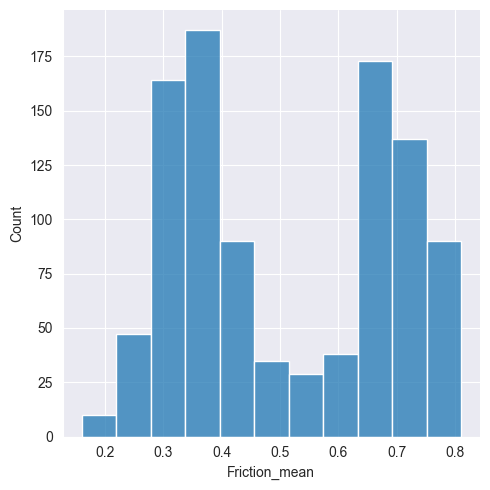

In [25]:
import seaborn as sns
sns.displot(x = sample1['Friction_mean'])

In [55]:
np.random.seed(42)
synthetic = bn.sample(1000, parall_count=2)

100%|██████████| 1000/1000 [01:52<00:00,  8.85it/s]


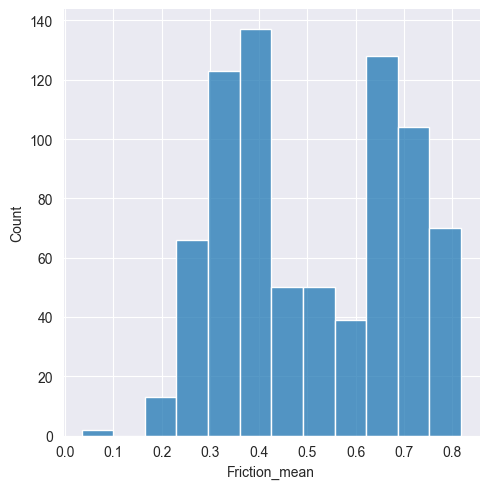

In [56]:
import seaborn as sns
sns.displot(x = synthetic['Friction_mean'])

In [57]:
from scipy.stats import kstest
kstest(sample1['Friction_mean'], synthetic['Friction_mean'])

KstestResult(statistic=0.05677237851662404, pvalue=0.11246574557688344)

Двухвыборочный тест хи-квадрат согласия с распределением
Описание: [ссылка](https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/chi2samp.htm)

In [70]:
from scipy.stats import chi2
def chisq_2samp(freq1: np.ndarray, freq2: np.ndarray):
    # it is supposed that the numbers of non-empty bins are equal
    # freq1.shape[0] = freq2.shape[0]
    K1 = np.sqrt(freq2.sum()/freq1.sum())
    K2 = 1/K1
    c = int(freq1.sum()==freq2.sum())
    nbins = freq1.shape[0]
    t = np.sum( (K1*freq1-K2*freq2)**2/(freq1+freq2) )
    return {
    "statistic": t,
    "pvalue": 1 - chi2.cdf(x = t, df = nbins - c)
    }

In [67]:
synthetic.dtypes

State_            object
pressure          object
humidity          object
Tsurf_mean       float64
FeelsLikeC        object
Water_mean       float64
Friction_mean    float64
Speed_mean       float64
totalSnow_cm     float64
Height_mean      float64
dtype: object

In [68]:
for feat in ['humidity', 'pressure', 'FeelsLikeC', 'State_']:
    synthetic[feat] = synthetic[feat].astype(np.int32)

In [83]:
for feat in ['humidity', 'pressure', 'FeelsLikeC', 'State_']:
    print(feat)
    nbins = min(10, sample1[feat].unique().shape[0])
    freqs1, freqs2 = np.histogram(sample1[feat], bins=nbins)[0], np.histogram(synthetic[feat], bins=nbins)[0]
    print(chisq_2samp(freqs1, freqs2))

humidity
{'statistic': 8.365512859091334, 'pvalue': 0.5931809182794996}
pressure
{'statistic': 24.172389676191678, 'pvalue': 0.007155730422357953}
FeelsLikeC
{'statistic': 9.251792135676586, 'pvalue': 0.5083860646839998}
State_
{'statistic': 0.5537594144815567, 'pvalue': 0.9971214716557341}


In [58]:
for feat in sample1.columns.difference(['humidity', 'pressure', 'FeelsLikeC', 'State_']):
    print(feat)
    print(kstest(sample1[feat], synthetic[feat]))

Friction_mean
KstestResult(statistic=0.05677237851662404, pvalue=0.11246574557688344)
Height_mean
KstestResult(statistic=0.04751150895140665, pvalue=0.26413703800326166)
Speed_mean
KstestResult(statistic=0.08133503836317135, pvalue=0.00558959451763427)
Tsurf_mean
KstestResult(statistic=0.037069053708439895, pvalue=0.5659330457866506)
Water_mean
KstestResult(statistic=0.07687979539641944, pvalue=0.010427285880224854)
totalSnow_cm
KstestResult(statistic=0.10273401534526855, pvalue=0.00017157629508205438)


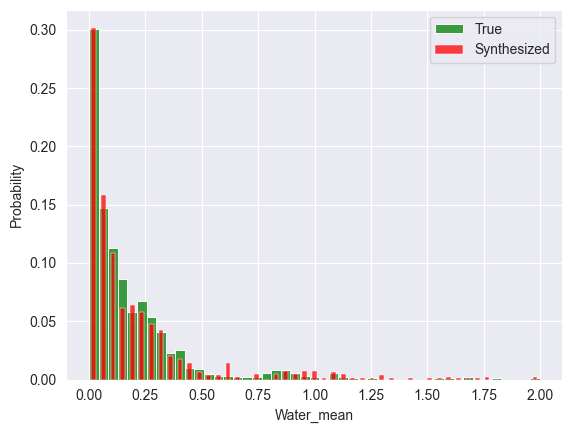

In [59]:
bins = np.histogram_bin_edges(sample1['Water_mean'], bins='auto')
sns.histplot(x = sample1['Water_mean'], color='green', stat = 'probability', label='True', bins=bins)
sns.histplot(x = synthetic['Water_mean'], color='red', stat = 'probability', label='Synthesized', bins=bins, shrink=0.5)
plt.legend()

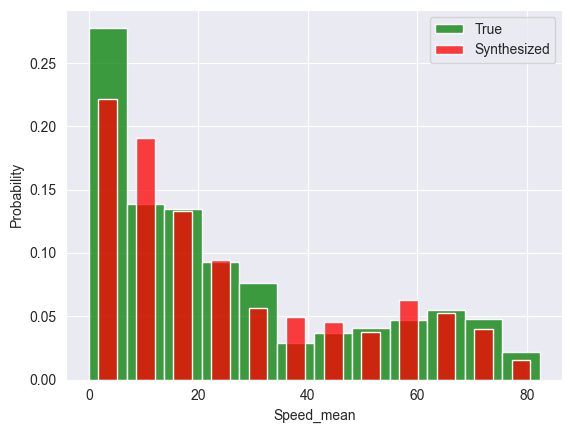

In [60]:
bins = np.histogram_bin_edges(sample1['Speed_mean'], bins='auto')
sns.histplot(x = sample1['Speed_mean'], color='green', stat = 'probability', label='True', bins=bins)
sns.histplot(x = synthetic['Speed_mean'], color='red', stat = 'probability', label='Synthesized', bins=bins, shrink=0.5)
plt.legend()

,name,node_type,data_type,parents,parents_types
0,State_,Discrete,disc_num,[],[]
1,pressure,Discrete,disc_num,[State_],[disc_num]
2,humidity,Discrete,disc_num,"[State_, pressure]","[disc_num, disc_num]"
3,Tsurf_mean,ConditionalMixtureGaussian,cont,"[State_, pressure, humidity]","[disc_num, disc_num, disc_num]"
4,FeelsLikeC,Discrete,disc_num,"[State_, pressure, humidity]","[disc_num, disc_num, disc_num]"
5,Water_mean,ConditionalMixtureGaussian,cont,"[Tsurf_mean, State_, pressure]","[cont, disc_num, disc_num]"
6,Friction_mean,ConditionalMixtureGaussian,cont,"[Water_mean, State_, pressure]","[cont, disc_num, disc_num]"
7,Speed_mean,ConditionalMixtureGaussian,cont,"[Water_mean, Friction_mean, pressure]","[cont, cont, disc_num]"
8,totalSnow_cm,ConditionalMixtureGaussian,cont,"[Friction_mean, State_, pressure]","[cont, disc_num, disc_num]"
9,Height_mean,ConditionalMixtureGaussian,cont,"[Friction_mean, Speed_mean, pressure]","[cont, cont, disc_num]"


In [30]:
bn2 = HybridBN(use_mixture=True)

In [31]:
bn2.add_nodes(p.info)

In [32]:
from pgmpy.estimators import K2Score

In [33]:
bn2.add_edges(data = disc_sample1, scoring_function=("K2",K2Score))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [34]:
bn2.plot(output='bn2.html')

![](bn2.png)

In [35]:
bn2.fit_parameters(data=sample1)

In [36]:
synthetic2 = bn2.sample(1000, parall_count=1)

100%|██████████| 1000/1000 [00:06<00:00, 146.55it/s]


In [82]:
for feat in ['humidity', 'pressure', 'FeelsLikeC', 'State_']:
    print(feat)
    nbins = min(10, sample1[feat].unique().shape[0])
    freqs1, freqs2 = np.histogram(sample1[feat], bins=nbins)[0], np.histogram(synthetic2[feat], bins=nbins)[0]
    print(chisq_2samp(freqs1, freqs2))

humidity
{'statistic': 28.07816766793343, 'pvalue': 0.0017539479385105805}
pressure
{'statistic': 5.030025137951867, 'pvalue': 0.8891632993564029}
FeelsLikeC
{'statistic': 4.880554518984383, 'pvalue': 0.8990128324811295}
State_
{'statistic': 4.794781752004442, 'pvalue': 0.5703905744660105}


In [37]:
for feat in sample1.columns.difference(['humidity', 'pressure', 'FeelsLikeC', 'State_']):
    print(feat)
    print(kstest(sample1[feat], synthetic2[feat]))

Friction_mean
KstestResult(statistic=0.07233663366336633, pvalue=0.017457690560493414)
Height_mean
KstestResult(statistic=0.027782178217821783, pvalue=0.8678146645537401)
Speed_mean
KstestResult(statistic=0.21597029702970297, pvalue=9.540936820089818e-19)
Tsurf_mean
KstestResult(statistic=0.039465346534653466, pvalue=0.4739184638054762)
Water_mean
KstestResult(statistic=0.16, pvalue=1.844634705069901e-10)
totalSnow_cm
KstestResult(statistic=0.05139603960396039, pvalue=0.180336436216526)


In [62]:
bins

array([ 0.        ,  6.86666667, 13.73333333, 20.6       , 27.46666667,
       34.33333333, 41.2       , 48.06666667, 54.93333333, 61.8       ,
       68.66666667, 75.53333333, 82.4       ])

In [38]:
import matplotlib.pyplot as plt

In [39]:
for feat in ['humidity', 'pressure', 'FeelsLikeC', 'State_']:
    synthetic2[feat] = synthetic2[feat].astype(np.int32)

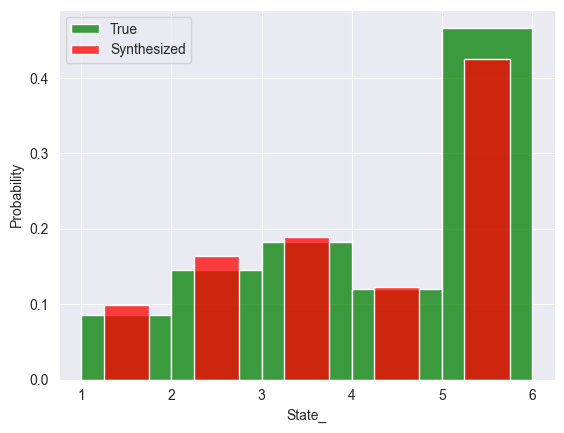

In [64]:
bins = np.array([1,2,3,4,5,6], dtype=float)
sns.histplot(x = sample1['State_'], color='green', stat = 'probability', label='True', bins=bins)
sns.histplot(x = synthetic2['State_'], color='red', stat = 'probability', label='Synthesized', shrink=0.5, bins=bins)
plt.legend()

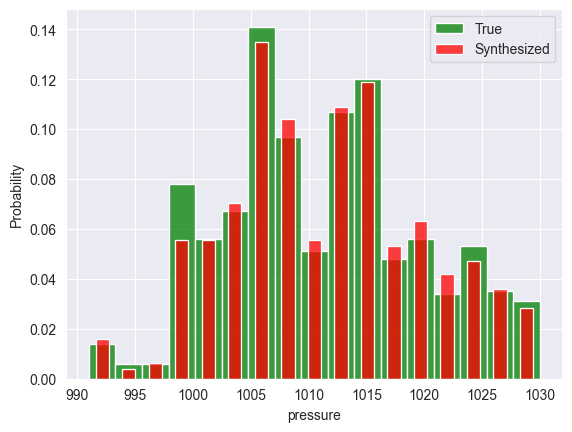

In [65]:
bins = np.histogram_bin_edges(sample1['pressure'], bins='auto')
sns.histplot(x = sample1['pressure'], color='green', stat = 'probability', label='True', bins=bins)
sns.histplot(x = synthetic2['pressure'], color='red', stat = 'probability', label='Synthesized', shrink=0.5, bins=bins)
plt.legend()

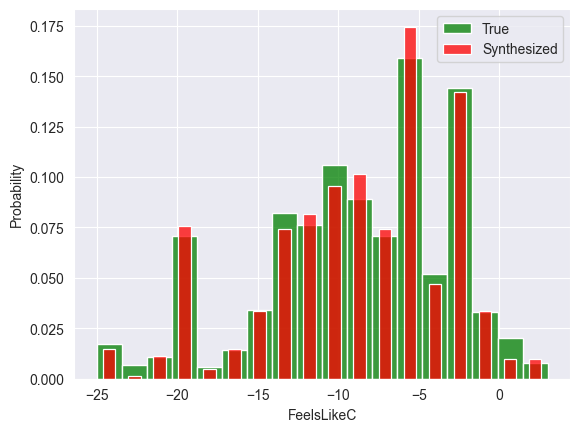

In [42]:
bins = np.histogram_bin_edges(sample1['FeelsLikeC'], bins='auto')
sns.histplot(x = sample1['FeelsLikeC'], color='green', stat = 'probability', label='True', bins=bins)
sns.histplot(x = synthetic2['FeelsLikeC'], color='red', stat = 'probability', label='Synthesized', bins=bins, shrink=0.5)
plt.legend()

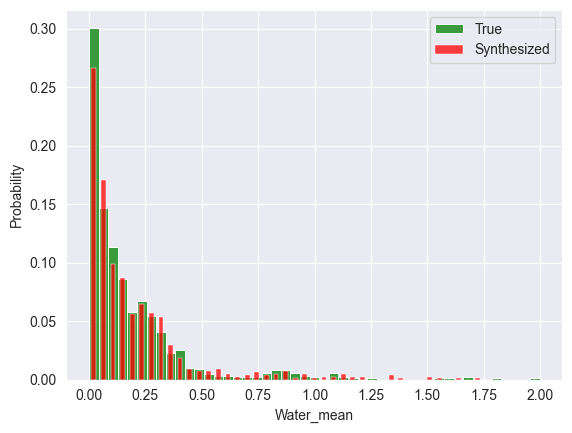

In [54]:
bins = np.histogram_bin_edges(sample1['Water_mean'], bins='auto')
sns.histplot(x = sample1['Water_mean'], color='green', stat = 'probability', label='True', bins=bins)
sns.histplot(x = synthetic2['Water_mean'], color='red', stat = 'probability', label='Synthesized', bins=bins, shrink=0.5)
plt.legend()

In [43]:
sample1.columns

Index(['Friction_mean', 'Water_mean', 'Tsurf_mean', 'humidity', 'State_',
       'Speed_mean', 'pressure', 'Height_mean', 'FeelsLikeC', 'totalSnow_cm'],
      dtype='object')

In [44]:
bn_man = HybridBN(use_mixture=True, has_logit=False)
bn_man.add_nodes(p.info)
bn_man.edges = [
    ['State_', 'Friction_mean'],
    ['State_', 'humidity'],
    ['State_', 'totalSnow_cm'],
    ['FeelsLikeC', 'Tsurf_mean'],
    ['Speed_mean', 'FeelsLikeC'],
    ['Water_mean', 'Friction_mean'],
    ['totalSnow_cm', 'Water_mean'],
    ['Height_mean', 'pressure'],
    ['Height_mean', 'FeelsLikeC'],
    ['pressure', 'Speed_mean'],
    ['Tsurf_mean', 'Friction_mean'],
    ['humidity', 'Friction_mean'],
    ['Height_mean', 'totalSnow_cm']
]

![](bn_man.png)

In [45]:
bn_man.plot(output='bn_man.html')

In [46]:
bn_man.fit_parameters(data=sample1)

In [47]:
synthetic_man = bn_man.sample(1000, parall_count=1)

100%|██████████| 1000/1000 [00:00<00:00, 6172.84it/s]


In [81]:
for feat in ['humidity', 'pressure', 'FeelsLikeC', 'State_']:
    print(feat)
    nbins = min(10, sample1[feat].unique().shape[0])
    freqs1, freqs2 = np.histogram(sample1[feat], bins=nbins)[0], np.histogram(synthetic_man[feat], bins=nbins)[0]
    print(chisq_2samp(freqs1, freqs2))

humidity
{'statistic': 27.381371593429805, 'pvalue': 0.002265808991513185}
pressure
{'statistic': 5.6456311353301905, 'pvalue': 0.8441055207961488}
FeelsLikeC
{'statistic': 8.954326630101177, 'pvalue': 0.5364435824067564}
State_
{'statistic': 5.869768616649512, 'pvalue': 0.43793584109838657}


In [48]:
for feat in sample1.columns.difference(['humidity', 'pressure', 'FeelsLikeC', 'State_']):
    print(feat)
    print(kstest(sample1[feat], synthetic_man[feat]))

Friction_mean
KstestResult(statistic=0.17896882494004795, pvalue=1.0193881649443701e-08)
Height_mean
KstestResult(statistic=0.18400479616306956, pvalue=3.427893238074361e-09)
Speed_mean
KstestResult(statistic=0.2670263788968825, pvalue=5.776805676298009e-19)
Tsurf_mean
KstestResult(statistic=0.10365707434052758, pvalue=0.0032688316694448475)
Water_mean
KstestResult(statistic=0.341968824940048, pvalue=4.625048594943436e-31)
totalSnow_cm
KstestResult(statistic=0.7138057553956835, pvalue=4.179186392425583e-146)


In [49]:
for feat in ['humidity', 'pressure', 'FeelsLikeC', 'State_']:
    synthetic_man[feat] = synthetic_man[feat].astype(np.int32)

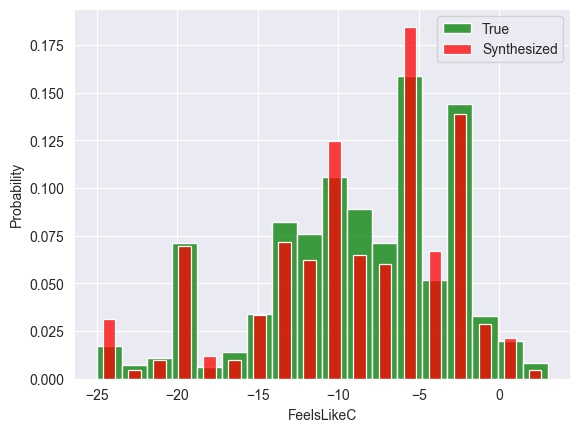

In [50]:
bins = np.histogram_bin_edges(sample1['FeelsLikeC'], bins='auto')
sns.histplot(x = sample1['FeelsLikeC'], color='green', stat = 'probability', label='True', bins=bins)
sns.histplot(x = synthetic_man['FeelsLikeC'], color='red', stat = 'probability', label='Synthesized', bins=bins, shrink=0.5)
plt.legend()

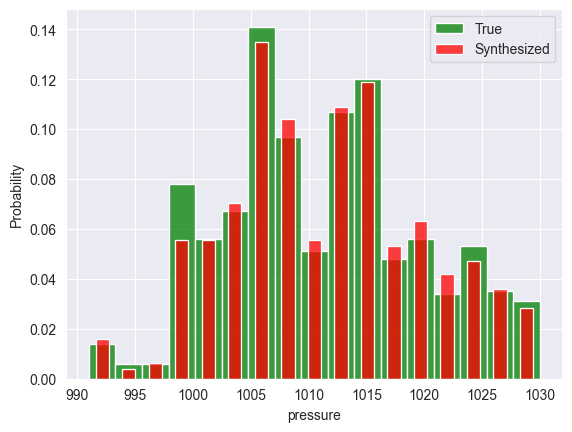

In [51]:
bins = np.histogram_bin_edges(sample1['pressure'], bins='auto')
sns.histplot(x = sample1['pressure'], color='green', stat = 'probability', label='True', bins=bins)
sns.histplot(x = synthetic2['pressure'], color='red', stat = 'probability', label='Synthesized', bins=bins, shrink=0.5)
plt.legend()

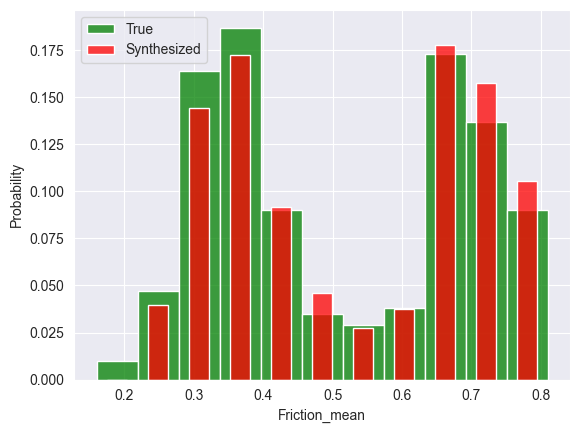

In [52]:
bins = np.histogram_bin_edges(sample1['Friction_mean'], bins='auto')
sns.histplot(x = sample1['Friction_mean'], color='green', stat = 'probability', label='True', bins=bins)
sns.histplot(x = synthetic2['Friction_mean'], color='red', stat = 'probability', label='Synthesized', bins=bins, shrink=0.5)
plt.legend()

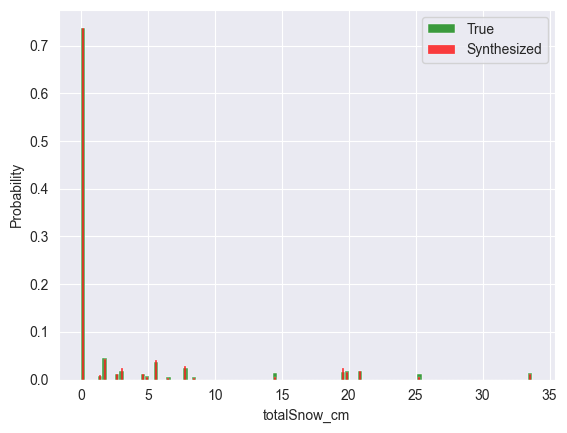

In [53]:
bins = np.histogram_bin_edges(sample1['totalSnow_cm'], bins='auto')
sns.histplot(x = sample1['totalSnow_cm'], color='green', stat = 'probability', label='True', bins=bins)
sns.histplot(x = synthetic2['totalSnow_cm'], color='red', stat = 'probability', label='Synthesized', bins=bins, shrink=0.5)
plt.legend()